# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms

sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words = set(['free', 'prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x, y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
import numpy as np


def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y, z in zip(Y_obs, Z_obs)])

In [6]:
F_X_12([1, 0])

np.float64(0.9551328068916008)

This is the JDF for this problem

In [7]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0, 2):
    print("y <= %d \t" % x1, end='')
    for x2 in range(0, 2):
        print("%.2f" % (F_X_12((x1, x2))), end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [8]:
F_X_12((1, 0))

np.float64(0.9551328068916008)

In [9]:
F_X_12((0, 0)) == F_X_12((0, 1)) * F_X_12((1, 0))

np.False_

In [10]:
F_X_12((0, 1)) * F_X_12((1, 0))

np.float64(0.8270846721557743)

In [11]:
# Are they independent? If so, then the JDF is just the product of the
# DFs for Y and Z, but
0.865936826992103 * 0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [12]:
np.mean([y for z, y in zip(Z_obs, Y_obs) if z == 1])

np.float64(0.812)

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [13]:
# Or we can just compute it directly
np.mean(Y_obs)

np.float64(0.13406317300789664)

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [14]:
x = np.random.normal(size=100)

In [15]:
np.mean(x)

np.float64(-0.016589811799906623)

In [16]:
g = lambda x: x ** 2

In [17]:
mean = np.mean(x)
y = x - mean
np.mean(y ** 4)

np.float64(4.550978646517943)

## Moments etc

In [18]:
import numpy as np

x = np.random.normal(size=100)

In [19]:
x

array([-1.35730379,  0.43551896, -0.36317382,  0.32872728, -1.28280993,
        0.18994275, -0.90202622, -0.4816999 ,  0.60793053, -0.51684483,
       -0.6514042 , -0.53118649,  0.17926396, -1.28243446, -0.05874336,
       -0.36405359,  1.38494016,  0.00711131, -0.30876994,  0.29266791,
       -0.58861895,  0.44417287, -1.27772398, -1.21551721,  1.04606382,
        0.06957944, -0.31909998,  1.24930518,  0.64843046, -0.23800259,
       -0.31169579, -0.81802764,  1.1914789 , -1.20228973, -0.16895541,
        0.44851363, -0.91944073,  0.85675683, -1.03515732,  0.87763411,
       -0.48893526,  1.55409069, -0.19535075,  0.23334074,  0.82513946,
       -0.611933  ,  0.37470995,  0.02269703, -0.59455958, -0.88140624,
        0.34160401,  2.12942072,  0.56529213, -1.31995004,  0.86758029,
        0.87540578, -0.00466487,  1.55318568, -1.5786105 ,  0.02428969,
        0.66072096, -1.60243345,  2.08803523,  0.32706188,  1.87935775,
        0.35304708,  1.16004885,  0.89418436,  0.91780017,  0.09

## Sample mean

In [20]:
np.mean(x)

np.float64(0.00812258238821369)

## Sample variance

In [21]:
np.var(x)

np.float64(0.7967606897106824)

Or by doing it yourself

In [22]:
mu = np.mean(x)
np.mean(np.power(x - mu, 2))

np.float64(0.7967606897106824)

Higher moments, we can use `scipy`

In [23]:
from scipy.stats import skew, kurtosis

In [24]:
skew(x)

np.float64(0.38149118907351104)

In [25]:
kurtosis(x, fisher=False)

np.float64(2.8151319038186173)

## Moments and tail behavior

In [26]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data - mean) / std

(-3.0, 5.0)

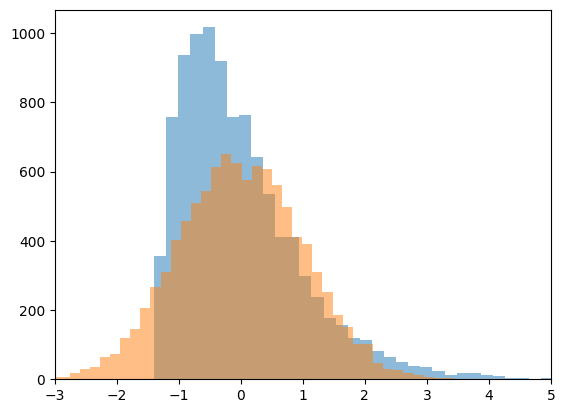

In [27]:
import numpy as np

chi2 = np.random.chisquare(4, size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt

_ = plt.hist(standardize(chi2), bins=50, alpha=0.5)
_ = plt.hist(standardize(normal), bins=50, alpha=0.5)
plt.xlim(-3, 5)

In [28]:
from scipy.stats import skew, kurtosis


def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (
    np.mean(data), np.std(data), skew(data), kurtosis(data, fisher=False)))

In [29]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: 0.03	kurtosis: 2.94


In [30]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.55	kurtosis: 7.24


In [31]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.42	kurtosis: 3.24


In [32]:
np.mean(np.power(standardize(chi2), 3))  # Skewness

np.float64(1.551091421817855)

In [33]:
np.mean(np.power(standardize(chi2), 4))  # kurtosis

np.float64(7.239213232139549)

## Transformations of random variables

Consider a Binomial random variable

In [34]:
n = 10
p = 0.5
x = np.random.binomial(n, p, size=1000)

Lets plot the empirical density

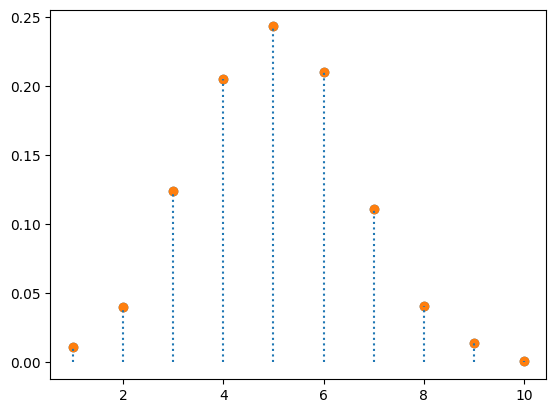

In [35]:
from Utils import makeEMF, makeEDF, plotEDF, plotEMF

plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

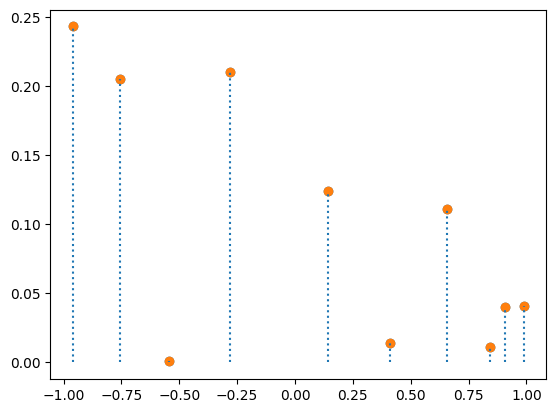

In [36]:
plotEMF(makeEMF(np.sin(x)))

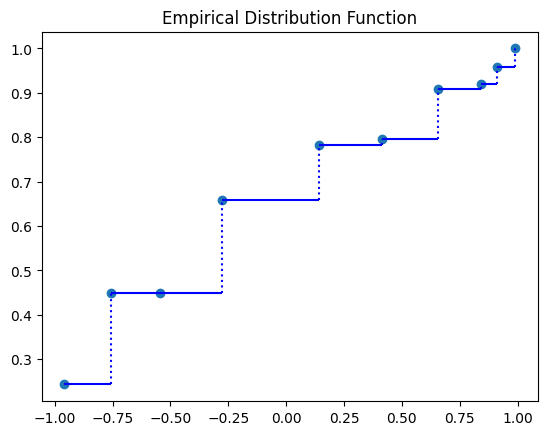

In [37]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [38]:
Y_space = np.sort(np.sin(np.arange(0, 11)))
sin_inv = dict(zip(np.sin(np.arange(0, 11)), np.arange(0, 11)))

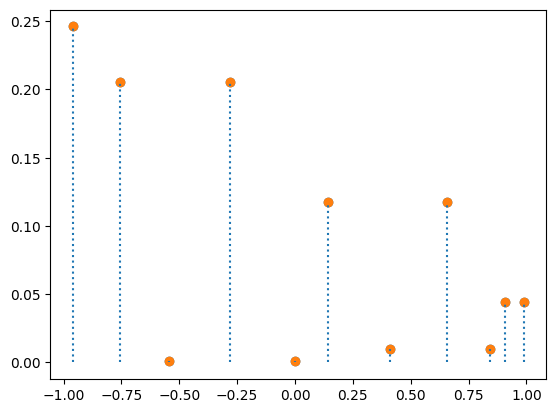

In [39]:
from scipy.special import binom as binomial

plotEMF([(y, binomial(n, sin_inv[y]) * (p ** sin_inv[y]) * ((1 - p) ** (n - sin_inv[y]))) for y in Y_space])

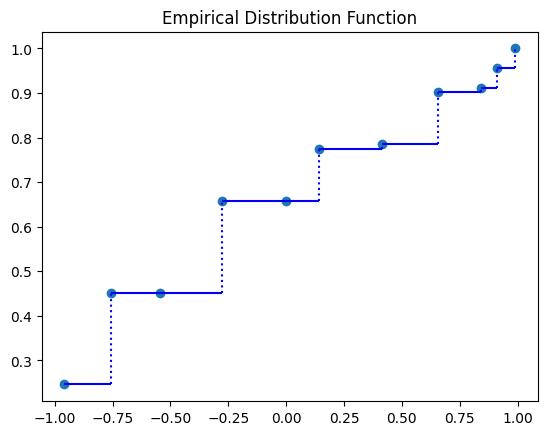

In [40]:
from Code.Utils import emfToEdf

plotEDF(emfToEdf([(y, binomial(n, sin_inv[y]) * (p ** sin_inv[y]) * ((1 - p) ** (n - sin_inv[y]))) for y in Y_space]))